In [6]:
import geopandas as gpd

In [20]:
house_gdf_dict = dict()
datasets = ['fc', 'kc', 'sp', 'poa']

In [31]:
for dname in datasets:
    house_gdf = gpd.read_file(f'{dname}/house_gdf_poi_processed.geojson', driver='GeoJSON')
    house_gdf_dict[dname] = house_gdf

In [32]:
tag_dict_list = [
    {'amenity':'hospital'},
    {'amenity': 'university'},
    {'amenity': 'school'},
    {'amenity': 'place_of_worship'},
    {'landuse': 'cemetery'},
    {'landuse': 'commercial'},
    {'landuse': 'industrial'},
    {'landuse': 'retail'},
    {'landuse': 'railway'},
    {'leisure': 'golf_course'},
    {'leisure': 'park'},
    {'leisure': 'sports_centre'},
    {'natural': 'water'},
    {'natural': 'wood'},
    {'aeroway': 'aerodrome'}
]

In [130]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

rows = []
zeta_list = [zeta / 1000 for zeta in range(5, 150, 5)]
for dname in datasets:
    print(dname)
    house_gdf = house_gdf_dict[dname]
    
    r2_list = [dname]
    for zeta in zeta_list:
        fname_list = []
        for ttag_dict in tag_dict_list:
            fname = ','.join(['-'.join(items) for items in ttag_dict.items()])
            fname_list.append(fname)

            house_gdf[fname + '_proximity'] = np.exp(- (house_gdf[fname + '_dist'] / zeta)**2 / 2)

        attr_names = [c for c in house_gdf.columns if c[:4] == 'attr']
        for attr in attr_names:
            house_gdf[attr] = house_gdf[attr].astype(float)

        df = house_gdf.copy()#pd.DataFrame(dict(X1=X1, X2=X2, X3=X3, X4=X4, X5=X5, Y=Y0+err))
        # model = sm.OLS(df["price"], sm.add_constant(df[attr_names + [fn + '_proximity' for fn in fname_list]]), missing="drop").fit()
        #model = sm.OLS(df["price"], sm.add_constant(df[attr_names + [fn + '_proximity' for fn in fname_list]]), missing="drop").fit()
        model = sm.OLS(df["price"], sm.add_constant(df[[fn + '_proximity' for fn in fname_list]]), missing="drop").fit()
        #print(zeta, model.rsquared, sep='\t')
        r2_list.append(model.rsquared)
    rows.append(r2_list)
        
fdf = pd.DataFrame(rows, columns = ['Dataset'] + zeta_list)

fc
kc
sp
poa


In [131]:
import matplotlib.pyplot as plt

In [132]:
import matplotlib.colors as mcolors


mcolors.TABLEAU_COLORS
mcolors.XKCD_COLORS
mcolors.CSS4_COLORS
#Base colors are in RGB so they need to be converted to HEX
BASE_COLORS_hex = {name:mcolors.rgb2hex(color) for name,color in mcolors.BASE_COLORS.items()}


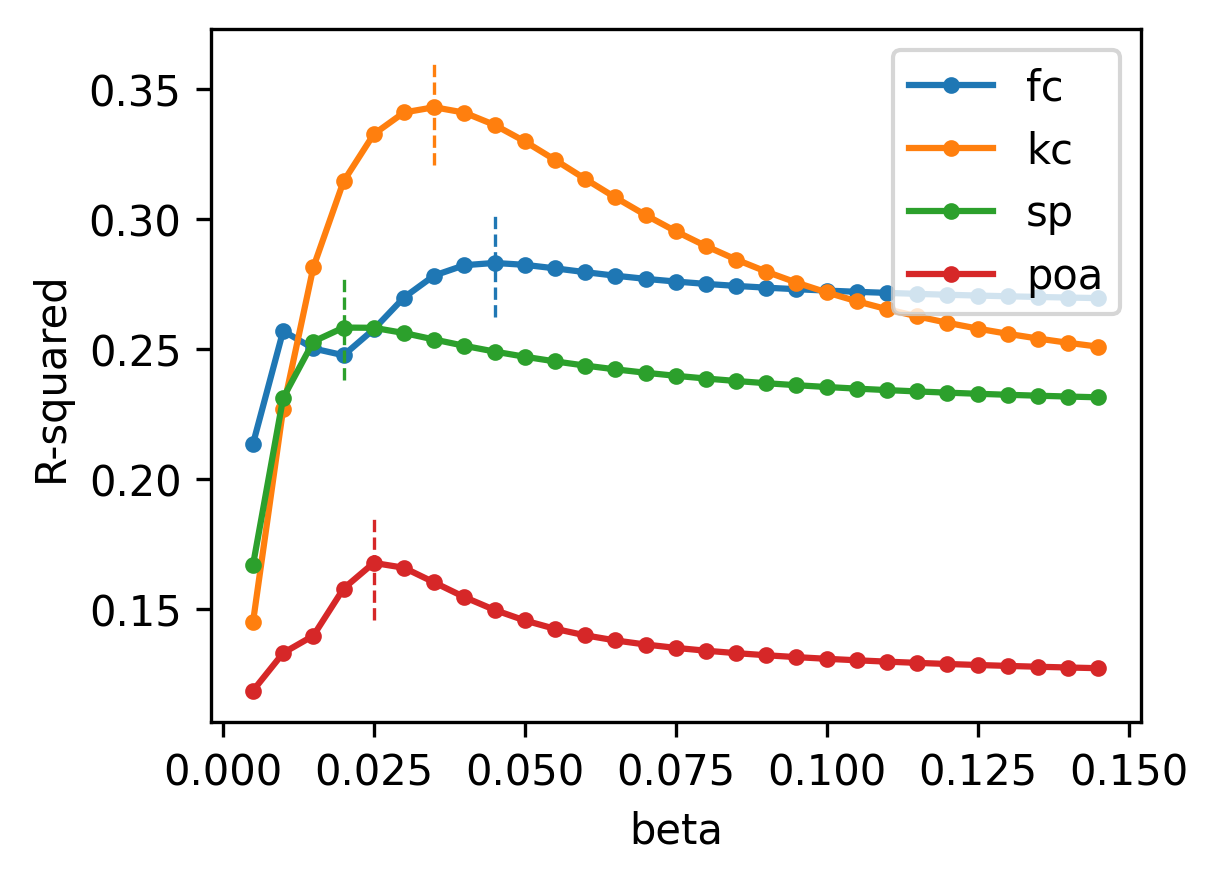

In [133]:
fig, ax = plt.subplots(figsize=(4, 3))
ffdf = fdf.set_index('Dataset').T
ffdf.plot(ax=ax, marker='.')
plt.ylabel('R-squared')
plt.xlabel('beta')
plt.vlines(0.045, ffdf.iloc[9]['fc'] - 0.02, ffdf.iloc[9]['fc'] + 0.02, linewidth=.8, linestyle='--', color=mcolors.TABLEAU_COLORS['tab:blue'])
plt.vlines(0.035, ffdf.iloc[7]['kc'] - 0.02, ffdf.iloc[7]['kc'] + 0.02, linewidth=.8, linestyle='--', color=mcolors.TABLEAU_COLORS['tab:orange'])
plt.vlines(0.020, ffdf.iloc[4]['sp'] - 0.02, ffdf.iloc[4]['sp'] + 0.02, linewidth=.8, linestyle='--', color=mcolors.TABLEAU_COLORS['tab:green'])
plt.vlines(0.025, ffdf.iloc[5]['poa'] - 0.02, ffdf.iloc[5]['poa'] + 0.02, linewidth=.8, linestyle='--', color=mcolors.TABLEAU_COLORS['tab:red'])

plt.legend(loc='upper right')
# Set a higher DPI value (e.g., 300)
fig.set_dpi(300)

# Save the figure with high resolution
fig.savefig(f'beta_study.png', dpi=300,bbox_inches='tight')

In [138]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

mdict = {}
pvdict = {}

for dname in datasets:
    print(dname)
    house_gdf = house_gdf_dict[dname]

    df = house_gdf.copy()
    model = sm.OLS(df["price"], sm.add_constant(df[[fn + '_proximity' for fn in fname_list]]), missing="drop").fit()
    #print(model.summary2())
    
    mdict[dname] = dict(model.params)
    pvdict[dname] = dict(model.pvalues)

fc
kc
sp
poa


In [116]:
pd.DataFrame(mdict).T[[fn + '_proximity' for fn in fname_list]]

,amenity-hospital_proximity,amenity-university_proximity,amenity-school_proximity,amenity-place_of_worship_proximity,landuse-cemetery_proximity,landuse-commercial_proximity,landuse-industrial_proximity,landuse-retail_proximity,landuse-railway_proximity,leisure-golf_course_proximity,leisure-park_proximity,leisure-sports_centre_proximity,natural-water_proximity,natural-wood_proximity,aeroway-aerodrome_proximity
fc,-4.216686,-1.839845,10.034365,-1.477325,2.740117,0.532295,-17.141772,5.478118,8.020293,-1.013041,-8.489050,-1.293872,19.647032,0.896526,-0.242203
kc,-0.166334,0.948798,1.733643,0.690319,-0.700026,-0.915349,-6.156822,-0.858558,-0.347005,0.447310,-0.434633,1.313716,-8.007387,3.513852,-0.809502
sp,8.895418,6.446584,-31.703353,-9.294116,1.412043,4.320285,-9.743264,-1.301842,-0.973199,0.650134,-6.974404,-3.380056,-5.501099,-4.756220,0.999485
poa,-8.902002,-1.450346,-119.545351,1.673320,11.879939,10.879324,3.773114,10.626942,-3.187533,4.926947,-21.441832,2.381138,27.740854,-5.288774,1.532742


In [141]:
pd.DataFrame(pvdict).T[[fn + '_proximity' for fn in fname_list]] < 0.05

,amenity-hospital_proximity,amenity-university_proximity,amenity-school_proximity,amenity-place_of_worship_proximity,landuse-cemetery_proximity,landuse-commercial_proximity,landuse-industrial_proximity,landuse-retail_proximity,landuse-railway_proximity,leisure-golf_course_proximity,leisure-park_proximity,leisure-sports_centre_proximity,natural-water_proximity,natural-wood_proximity,aeroway-aerodrome_proximity
fc,True,True,True,True,True,False,True,True,True,False,True,True,True,True,False
kc,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True
sp,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
poa,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True


In [118]:
for fn in fname_list:
    print(fn)

amenity-hospital
amenity-university
amenity-school
amenity-place_of_worship
landuse-cemetery
landuse-commercial
landuse-industrial
landuse-retail
landuse-railway
leisure-golf_course
leisure-park
leisure-sports_centre
natural-water
natural-wood
aeroway-aerodrome
